<a href="https://colab.research.google.com/github/mikemwai/signsense/blob/development/signsense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import os

# Set the locale to UTF-8
os.environ['LANG'] = 'en_US.UTF-8'
os.environ['LC_ALL'] = 'en_US.UTF-8'

# Install packages
!pip install pillow gdown ultralytics tensorboard

In [ ]:
!pip install pillow
!pip install gdown
!pip install ultralytics
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 27.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import gdown
import zipfile
import random
from sklearn.model_selection import train_test_split
from PIL import Image, ExifTags
from google.colab import drive
from IPython.display import Image, display
from ultralytics import YOLO
from glob import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Import Dataset

## Downloading the dataset

### In Google Drive it's `kaggle_dataset.zip`. NOT SPLITTED, PREPROCESSED

In [ ]:
file_id = "1ACKuyIK269rDEQMF95IOo1gYUuScLGeQ"

url = f"https://drive.google.com/uc?id={file_id}"

output = "kaggle_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1ACKuyIK269rDEQMF95IOo1gYUuScLGeQ
From (redirected): https://drive.google.com/uc?id=1ACKuyIK269rDEQMF95IOo1gYUuScLGeQ&confirm=t&uuid=cf254cc8-2a58-44d9-97f1-9d1567f35f25
To: /content/kaggle_dataset.zip
100%|██████████| 1.18G/1.18G [00:24<00:00, 48.6MB/s]


Folder extracted.


### In Google Drive it's `kaggle_dataset_classes.zip`. NOT PREPROCESSED

In [ ]:
file_id = "1taCOEIA5LDUBk4D1yF9Qc-SMFu1w2Pri"

url = f"https://drive.google.com/uc?id={file_id}"

output = "kaggle_dataset_classes.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1taCOEIA5LDUBk4D1yF9Qc-SMFu1w2Pri
From (redirected): https://drive.google.com/uc?id=1taCOEIA5LDUBk4D1yF9Qc-SMFu1w2Pri&confirm=t&uuid=e63c61fb-7ffd-466c-a877-48a5dc319510
To: /content/kaggle_dataset_classes.zip
100%|██████████| 827M/827M [00:13<00:00, 59.6MB/s]


Folder extracted.


### In Google Drive it's `new_kaggle_dataset.zip`. PREPROCESSED

In [ ]:
file_id = "1wcVmqMZ_D_v78R7ocJqhlO9XFVKxxBD6"

url = f"https://drive.google.com/uc?id={file_id}"

output = "new_kaggle_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1wcVmqMZ_D_v78R7ocJqhlO9XFVKxxBD6
From (redirected): https://drive.google.com/uc?id=1wcVmqMZ_D_v78R7ocJqhlO9XFVKxxBD6&confirm=t&uuid=a7324111-90b3-49b6-b8dd-642a5b5008a4
To: /content/new_kaggle_dataset.zip
100%|██████████| 284M/284M [00:07<00:00, 39.3MB/s]


Folder extracted.


### In Google Drive it's `roboflow_dataset.zip`

In [ ]:
file_id = "1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5"

url = f"https://drive.google.com/uc?id={file_id}"

output = "roboflow_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5
From (redirected): https://drive.google.com/uc?id=1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5&confirm=t&uuid=c629b512-d71c-4740-92b9-820eb420ab27
To: /content/roboflow_dataset.zip
100%|██████████| 323M/323M [00:07<00:00, 42.4MB/s]


Folder extracted.


## Checking for any errors in the dataset

In [ ]:
!unzip -t combined_dataset.zip

Archive:  combined_dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of combined_dataset.zip or
        combined_dataset.zip.zip, and cannot find combined_dataset.zip.ZIP, period.


## Extracting the zip folder

In [ ]:
z = zipfile.ZipFile('dataset.zip')
z.extractall()
print("Extraction complete!")

Extraction complete!


# Dataset Splitting

## Deleting any folder

In [ ]:
shutil.rmtree('datasets/dataset')

## Converting the kaggle dataset based on the classes

In [ ]:
csv_file = "C:\Datasets\Kaggle Dataset - Yonas\Kaggle Dataset\Kaggle Dataset - Yonas\Train.csv"
df = pd.read_csv(csv_file)

image_folder = "C:\Datasets\Kaggle Dataset - Yonas\Kaggle Dataset\Kaggle Dataset - Yonas\Images\Images"
output_folder = "new_dataset"

labels = df['Label'].unique()
for label in labels:
    label_path = os.path.join(output_folder, label)
    os.makedirs(label_path, exist_ok=True)

for index, row in df.iterrows():
    image_id = row['img_IDS']
    label = row['Label']

    src_image_path = os.path.join(image_folder, image_id + ".jpg")

    dest_folder = os.path.join(output_folder, label)
    dest_image_path = os.path.join(dest_folder, image_id + ".jpg")

    if os.path.exists(src_image_path):
        shutil.move(src_image_path, dest_image_path)
    else:
        print(f"Image {image_id}.jpg not found.")

print("Images have been organized based on their labels.")

### Splitting the dataset based on the classes

In [ ]:
class_names = ['church', 'enough', 'friend', 'love', 'me', 'mosque', 'seat', 'temple', 'you']

image_directories = ['./dataset/train/images', './dataset/valid/images', './dataset/test/images']
label_directories = ['./dataset/train/labels', './dataset/valid/labels', './dataset/test/labels']

output_directory = './sorted_by_class'

for class_name in class_names:
    class_folder = os.path.join(output_directory, class_name)
    os.makedirs(class_folder, exist_ok=True)

for img_dir, lbl_dir in zip(image_directories, label_directories):
    for label_file in os.listdir(lbl_dir):
        label_path = os.path.join(lbl_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_id = int(line.split()[0])

            img_file = label_file.replace('.txt', '.jpg')
            img_path = os.path.join(img_dir, img_file)

            if os.path.exists(img_path):
                dest_folder = os.path.join(output_directory, class_names[class_id])
                shutil.copy(img_path, dest_folder)

### Splitting into train, test and valid folders

In [ ]:
dataset_dir = 'dataset'
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

splits = ['train', 'valid', 'test']
output_dir = 'dataset_split'
os.makedirs(output_dir, exist_ok=True)

for split in splits:
    for category in os.listdir(dataset_dir):
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]

    if len(images) < 2:

        train_images = images
        val_images = []
        test_images = []
    else:

        train_images, test_images = train_test_split(images, test_size=(test_ratio + val_ratio))
        val_images, test_images = train_test_split(test_images, test_size=test_ratio / (test_ratio + val_ratio))

    def copy_images(image_list, split):
        for image in image_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(output_dir, split, category, image)
            shutil.copyfile(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'valid')
    copy_images(test_images, 'test')

print("Dataset split into train, valid, and test sets successfully!")

Dataset split into train, valid, and test sets successfully!


In [ ]:
dataset_dir = 'dataset_split'

splits = ['train', 'valid', 'test']

for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    if os.path.exists(split_dir):
        for category in os.listdir(split_dir):
            category_path = os.path.join(split_dir, category)
            if os.path.isdir(category_path):
                images = os.listdir(category_path)
                print(f"Found {len(images)} images for class {category} in {split} set")
            else:
                print(f"No images found for class {category} in {split} set")
    else:
        print(f"Directory {split_dir} does not exist.")

Found 486 images for class Enough in train set
Found 485 images for class Temple in train set
Found 486 images for class Mosque in train set
Found 485 images for class Love in train set
Found 486 images for class Seat in train set
Found 485 images for class Friend in train set
Found 485 images for class Church in train set
Found 485 images for class Me in train set
Found 485 images for class You in train set
Found 69 images for class Enough in valid set
Found 69 images for class Temple in valid set
Found 69 images for class Mosque in valid set
Found 69 images for class Love in valid set
Found 69 images for class Seat in valid set
Found 69 images for class Friend in valid set
Found 69 images for class Church in valid set
Found 69 images for class Me in valid set
Found 69 images for class You in valid set
Found 140 images for class Enough in test set
Found 140 images for class Temple in test set
Found 140 images for class Mosque in test set
Found 140 images for class Love in test set
Fou

## Converting the kaggle dataset to a YOLO format

In [ ]:
original_dataset_path = 'preprocessed_dataset'
output_path = 'new_kaggle_dataset'

classes = ['Church', 'Enough (Satisfied)', 'Friend', 'Love', 'Me', 'Mosque', 'Seat', 'Temple', 'You']

os.makedirs(os.path.join(output_path, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'valid/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'valid/labels'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'test/labels'), exist_ok=True)

split_folders = ['train', 'valid', 'test']

def process_images(class_name, img_files, phase):
    if not img_files:
        print(f"No images found for class {class_name} in {phase} phase!")
        return

    print(f"Processing {len(img_files)} images for {phase} phase in class {class_name}.")
    for img_file in img_files:
        img_name = os.path.basename(img_file)
        shutil.copy(img_file, os.path.join(output_path, f'{phase}/images', img_name))

        label_file = os.path.join(output_path, f'{phase}/labels', img_name.replace('.jpg', '.txt'))

        with open(label_file, 'w') as f:
            f.write("")

for class_name in classes:
    for phase in split_folders:
        class_path = os.path.join(original_dataset_path, phase, class_name)
        img_files = glob(os.path.join(class_path, '*.*'))

        print(f"Found {len(img_files)} images for class {class_name} in {phase} phase.")
        process_images(class_name, img_files, phase)

yaml_content = f"""
train: {output_path}/train/images
val: {output_path}/valid/images
test: {output_path}/test/images

nc: {len(classes)}  # Number of classes
names: {classes}  # Class names
"""

yaml_path = os.path.join(output_path, 'dataset.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print("Dataset successfully converted to YOLO format!")

Found 485 images for class Church in train phase.
Processing 485 images for train phase in class Church.
Found 69 images for class Church in valid phase.
Processing 69 images for valid phase in class Church.
Found 140 images for class Church in test phase.
Processing 140 images for test phase in class Church.
Found 0 images for class Enough (Satisfied) in train phase.
No images found for class Enough (Satisfied) in train phase!
Found 0 images for class Enough (Satisfied) in valid phase.
No images found for class Enough (Satisfied) in valid phase!
Found 0 images for class Enough (Satisfied) in test phase.
No images found for class Enough (Satisfied) in test phase!
Found 485 images for class Friend in train phase.
Processing 485 images for train phase in class Friend.
Found 69 images for class Friend in valid phase.
Processing 69 images for valid phase in class Friend.
Found 140 images for class Friend in test phase.
Processing 140 images for test phase in class Friend.
Found 485 images 

## Compressing the new dataset folder to a zip file

In [ ]:
folder_to_zip = 'new_kaggle_dataset'

output_zip_file = 'new_kaggle_dataset.zip'

shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' has been successfully compressed into '{output_zip_file}'")

Folder 'new_kaggle_dataset' has been successfully compressed into 'new_kaggle_dataset.zip'


# Exploratory Data Analysis

### Image Dataset

In [ ]:
total_images = 0

for root, dirs, files in os.walk("new_dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1

print(f'{total_images} images')

6249 images


In [ ]:
test_images = 0
train_images = 0
valid_images = 0

for root, dirs, files in os.walk("new_dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            if 'test' in root:
                test_images += 1
            elif 'train' in root:
                train_images += 1
            elif 'valid' in root:
                valid_images += 1

print(f'test: {test_images} images')
print(f'train: {train_images} images')
print(f'valid: {valid_images} images')

test: 1260 images
train: 4368 images
valid: 621 images


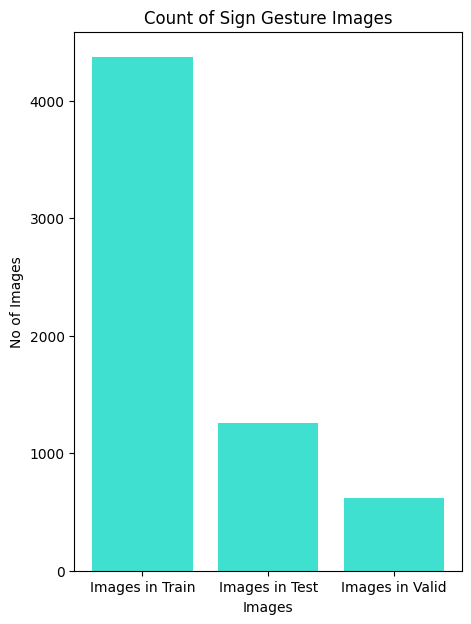

In [ ]:
data = {'Images in Train': train_images, 'Images in Test': test_images, 'Images in Valid': valid_images}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Images")
plt.ylabel("No of Images")
plt.title("Count of Sign Gesture Images")
plt.show()

### Video Dataset

In [ ]:
total_videos = 0

for root, dirs, files in os.walk("dataset_split"):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            total_videos += 1

print(f'{total_videos} videos')

0 videos


In [ ]:
test_videos = 0
train_videos = 0
valid_videos = 0

for root, dirs, files in os.walk("dataset_split"):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            if 'test' in root:
                test_videos += 1
            elif 'train' in root:
                train_videos += 1
            elif 'valid' in root:
                valid_videos += 1

print(f'test: {test_videos} videos')
print(f'train: {train_videos} videos')
print(f'valid: {valid_videos} videos')

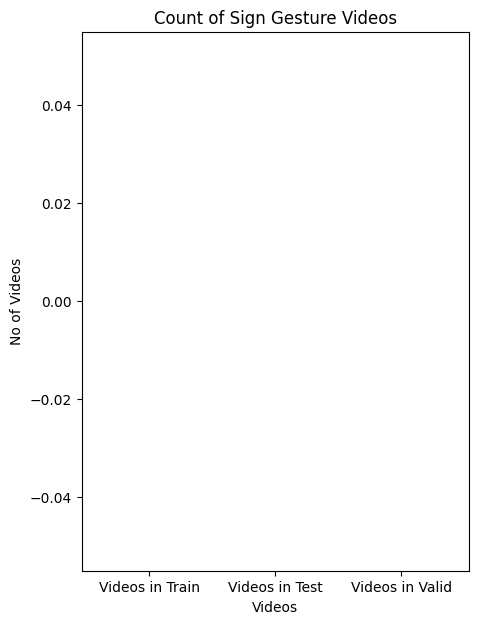

In [ ]:
data = {'Videos in Train': train_videos, 'Videos in Test': test_videos, 'Videos in Valid': valid_videos}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Videos")
plt.ylabel("No of Videos")
plt.title("Count of Sign Gesture Videos")
plt.show()

# Data Preprocessing

In [ ]:
import os
import shutil
from PIL import Image, ExifTags

input_dir = 'new_dataset'
output_dir = 'preprocessed_dataset'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)
            img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

Preprocessing complete.


In [ ]:
import os
from PIL import Image, ExifTags

input_dir = 'new_dataset'
output_dir = 'preprocessed_dataset'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)
            img.save(output_path)
            print(f"Successfully processed and saved: {output_path}")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

# Data Augmentation

In [ ]:
input_dir = 'preprocessed_dataset'
output_dir = 'augmented_dataset'

os.makedirs(output_dir, exist_ok=True)

def augment_image(image_path, output_path):
    try:
        with Image.open(image_path) as img:
            flipped_img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
            flipped_img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, f"flipped_{file}")

            augment_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Data augmentation complete.")

Data augmentation complete.


In [ ]:
dataset1_path = 'old_dataset'
dataset2_path = 'yolo_format_dataset'

combined_output_path = 'combined_yolo_dataset'

for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(combined_output_path, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(combined_output_path, split, 'labels'), exist_ok=True)

def merge_datasets(split):
    for dataset_path in [dataset1_path, dataset2_path]:
        image_files = glob(os.path.join(dataset_path, split, 'images', '*.*'))
        for img_file in image_files:
            img_name = os.path.basename(img_file)
            new_img_name = f"{os.path.basename(dataset_path)}_{img_name}"
            shutil.copy(img_file, os.path.join(combined_output_path, split, 'images', new_img_name))

        label_files = glob(os.path.join(dataset_path, split, 'labels', '*.txt'))
        for label_file in label_files:
            label_name = os.path.basename(label_file)
            new_label_name = f"{os.path.basename(dataset_path)}_{label_name}"
            shutil.copy(label_file, os.path.join(combined_output_path, split, 'labels', new_label_name))

for split in ['train', 'valid', 'test']:
    merge_datasets(split)

dataset1_yaml = os.path.join(dataset1_path, 'data.yaml')
dataset2_yaml = os.path.join(dataset2_path, 'dataset.yaml')

with open(dataset1_yaml, 'r') as f:
    yaml_content = f.read()

yaml_combined_path = os.path.join(combined_output_path, 'dataset.yaml')
with open(yaml_combined_path, 'w') as f:
    f.write(yaml_content)

print("Datasets successfully merged!")

Datasets successfully merged!


## Model Building

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


### Run inference/ prediction on a sample image

100%|██████████| 49.2k/49.2k [00:00<00:00, 10.0MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 85.6ms
Speed: 11.9ms preprocess, 85.6ms inference, 824.4ms postprocess per image at shape (1, 3, 384, 640)


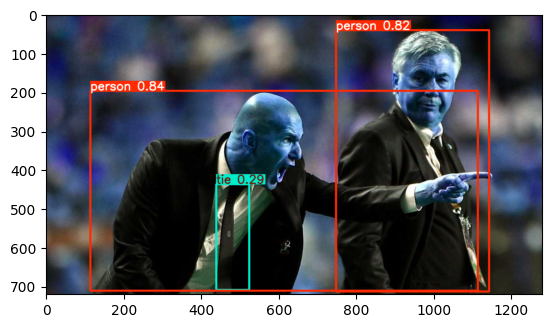

In [ ]:
results = model('https://ultralytics.com/images/zidane.jpg')
for result in results:
    plt.imshow(result.plot())
    plt.show()

### Access Predictions

In [ ]:
for result in results:
    print(result.boxes.xyxy)
    print(result.boxes.conf)
    print(result.boxes.cls)

tensor([[ 114.8700,  197.4120, 1114.4689,  711.8894],
        [ 748.4614,   41.8552, 1143.0757,  713.0239],
        [ 439.4747,  437.0735,  524.3459,  709.1597]], device='cuda:0')
tensor([0.8360, 0.8190, 0.2910], device='cuda:0')
tensor([ 0.,  0., 27.], device='cuda:0')


### Train on a custom dataset

In [ ]:
import os

paths_to_check = [
    'new_kaggle_dataset/train/images',
    'new_kaggle_dataset/valid/images',
    'new_kaggle_dataset/test/images'
]

for path in paths_to_check:
    if os.path.exists(path):
        print(f"Path exists: {path}")
    else:
        print(f"Path does not exist: {path}")

Path exists: new_kaggle_dataset/train/images
Path exists: new_kaggle_dataset/valid/images
Path exists: new_kaggle_dataset/test/images


In [ ]:
model.train(data='./datasets/new_kaggle_dataset/dataset.yaml', epochs=20, imgsz=640, batch=16)

Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/new_kaggle_dataset/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 5.35M/5.35M [00:00<00:00, 81.9MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/new_kaggle_dataset/train/labels... 3882 images, 3882 backgrounds, 0 corrupt: 100%|██████████| 3882/3882 [00:01<00:00, 2754.36it/s]


train: New cache created: /content/datasets/new_kaggle_dataset/train/labels.cache
WARNING ⚠️ No labels found in /content/datasets/new_kaggle_dataset/train/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/new_kaggle_dataset/valid/labels... 552 images, 552 backgrounds, 0 corrupt: 100%|██████████| 552/552 [00:00<00:00, 1591.46it/s]

val: New cache created: /content/datasets/new_kaggle_dataset/valid/labels.cache
WARNING ⚠️ No labels found in /content/datasets/new_kaggle_dataset/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train7/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.32G          0      109.8          0          0        640: 100%|██████████| 243/243 [01:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]

                   all        552          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.25G          0      61.74          0          0        640: 100%|██████████| 243/243 [01:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.81it/s]

                   all        552          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.24G          0      24.96          0          0        640: 100%|██████████| 243/243 [01:19<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.30it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

## Model Validation

In [ ]:
results = model.val(data='./dataset/data.yaml')
print(results)  # Print evaluation metrics

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,686,123 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 819 images, 9 backgrounds, 0 corrupt: 100%|██████████| 819/819 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:15<00:00,  3.43it/s]


                   all        819        811      0.927      0.931      0.932      0.611
                church         73         74      0.916      0.905      0.911      0.685
                enough        100        100      0.896       0.93      0.941      0.663
                friend         99         99      0.961      0.939      0.965      0.743
                  love         96         96      0.928      0.947      0.958      0.734
                    me        101        101      0.918      0.889      0.884      0.427
                mosque         83         83      0.941      0.928      0.913      0.638
                  seat         81         81       0.94      0.966      0.966      0.551
                temple         75         75       0.92       0.92      0.915      0.653
                   you        102        102      0.923      0.951      0.938      0.401
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect

In [ ]:
!tensorboard --logdir runs/detect/train92

SyntaxError: invalid syntax (<ipython-input-26-6e68d9bf8128>, line 1)

In [ ]:
results = model.predict(source='/content/dataset/test/images/ImageID_2Q61PJ0A_jpg.rf.a00f34d526db7127bc3849907b0e9a7a.jpg', save=True)  # Save output images with predictions


image 1/1 /content/dataset/test/images/ImageID_2Q61PJ0A_jpg.rf.a00f34d526db7127bc3849907b0e9a7a.jpg: 640x640 1 person, 1 bed, 34.1ms
Speed: 3.3ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train92223


In [ ]:
model.save('best_model.pt')

In [ ]:
results = model.predict(source='/content/dataset/test/images/ImageID_2Q61PJ0A_jpg.rf.a00f34d526db7127bc3849907b0e9a7a.jpg', show=True)  # Show predictions

In [ ]:
# Load the best model for inference
best_model = YOLO('best_model.pt')

# Test on a single image
results = best_model.predict(source='path/to/test/image.jpg', save=True)

# Test on a batch of images or a video
results_batch = best_model.predict(source='path/to/test/images_or_video', save=True)

# Print predictions
for result in results_batch:
    print(result)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the metrics from the training log CSV file
log_path = 'runs/detect/train/metrics.csv'  # Adjust the path based on your training run
metrics = pd.read_csv(log_path)

# Plotting precision, recall, and mAP
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(metrics['epoch'], metrics['metrics/precision(B)'], label='Precision', color='blue')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(metrics['epoch'], metrics['metrics/recall(B)'], label='Recall', color='orange')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.grid(True)
plt.legend()

# mAP
plt.subplot(1, 3, 3)
plt.plot(metrics['epoch'], metrics['metrics/mAP50(B)'], label='mAP@0.5', color='green')
plt.plot(metrics['epoch'], metrics['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='red')
plt.title('mAP over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/metrics.csv'

In [ ]:
model.export(format='onnx')